<a href="https://colab.research.google.com/github/Mukiti-Ryan/IS_Project_Presentation/blob/main/Customer_Churn_Prediction_(Log_Reg).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Year Project - Customer Churn Prediction System (Backend)**
---
This is the trial build of the customer churn prediction model backend using Logistic Regression


# **Step 1: Import Required Libraries and Load Dataset**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [4]:
df = pd.read_csv('/content/drive/MyDrive/IS Project 2 Datasets/churnmodel.csv')

df.shape

<ipython-input-4-a86b2ceeef59>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/IS Project 2 Datasets/churnmodel.csv')


(1000000, 16)

In [5]:
df.head()

,Unnamed: 0,CD_ACCOUNT,STATUS2,DAYS_ACC_OPEN,CD_TYPE,VL_CREDIT_RECENCY,VL_DEBIT_RECENCY,VL_TENOR,AVGCREDITTURNOVER_LY,AVGDEBITTURNOVER_LY,AVGCREDIT_TRANS_LY,AVGDEBIT_TRANS_LY,AVGCREDITTURNOVER_LY2,AVGDEBITTURNOVER_LY2,AVGCREDIT_TRANS_LY2,AVGDEBIT_TRANS_LY2
0,0,1100000000000.0,NOT CHURNED,6173,1062,21.0,0.0,6170.0,438197.26,-474788.26,3.08,93.66,720779.28,-748023.72,6.33,133.41
1,1,1100000000000.0,CHURNED,6163,1062,313.0,0.0,6118.0,1666.66,-6590.41,0.16,1.25,1666.66,-9322.83,0.16,3.08
2,2,1100000000000.0,CHURNED,6152,1062,2126.0,1949.0,6132.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,3,1100000000000.0,CHURNED,6124,1062,982.0,0.0,5770.0,0.00,-1220.00,0.00,0.41,0.00,-2102.00,0.00,0.91
4,4,1100000000000.0,NOT CHURNED,6117,1062,0.0,0.0,6091.0,4126.41,-200.50,1.08,3.66,7935.41,-395.00,2.08,7.50


In [6]:
print(df.dtypes)

Unnamed: 0                 int64
CD_ACCOUNT                object
STATUS2                   object
DAYS_ACC_OPEN              int64
CD_TYPE                    int64
VL_CREDIT_RECENCY        float64
VL_DEBIT_RECENCY         float64
VL_TENOR                 float64
AVGCREDITTURNOVER_LY     float64
AVGDEBITTURNOVER_LY      float64
AVGCREDIT_TRANS_LY       float64
AVGDEBIT_TRANS_LY        float64
AVGCREDITTURNOVER_LY2    float64
AVGDEBITTURNOVER_LY2     float64
AVGCREDIT_TRANS_LY2      float64
AVGDEBIT_TRANS_LY2       float64
dtype: object


In [7]:
df.describe()

,Unnamed: 0,DAYS_ACC_OPEN,CD_TYPE,VL_CREDIT_RECENCY,VL_DEBIT_RECENCY,VL_TENOR,AVGCREDITTURNOVER_LY,AVGDEBITTURNOVER_LY,AVGCREDIT_TRANS_LY,AVGDEBIT_TRANS_LY,AVGCREDITTURNOVER_LY2,AVGDEBITTURNOVER_LY2,AVGCREDIT_TRANS_LY2,AVGDEBIT_TRANS_LY2
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,499999.500000,2284.078102,1062.066047,1253.543128,1979.869018,1990.893697,6.199422e+04,-6.279789e+04,2.469594,4.593288,2.075194e+05,-2.086299e+05,4.622181,8.833637
std,288675.278932,1737.424068,0.248364,4144.026051,5478.787665,2768.767119,8.613043e+06,8.593854e+06,49.061543,17.684722,9.422977e+07,9.423014e+07,90.504225,29.221068
min,0.000000,20.000000,1062.000000,-300.000000,-81.000000,-19388.000000,-2.564250e+04,-6.375980e+09,-0.080000,0.000000,-2.564250e+04,-9.306696e+10,-0.080000,0.000000
25%,249999.750000,762.000000,1062.000000,0.000000,0.000000,684.000000,0.000000e+00,-1.022263e+04,0.000000,0.080000,2.080000e+00,-2.114132e+04,0.080000,0.250000
50%,499999.500000,1972.000000,1062.000000,26.000000,0.000000,1818.000000,2.416600e+02,-1.625000e+02,0.330000,0.580000,1.531630e+03,-1.333330e+03,0.580000,1.160000
75%,749999.250000,3461.000000,1062.000000,392.000000,378.000000,3391.000000,9.986130e+03,0.000000e+00,0.910000,3.910000,2.098290e+04,-3.100000e-01,1.660000,7.410000
max,999999.000000,44655.000000,1063.000000,19406.000000,19407.000000,44653.000000,6.375964e+09,1.563590e+03,25433.250000,12109.330000,9.306696e+10,1.563590e+03,47800.660000,15476.660000


In [8]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
CD_ACCOUNT,1100000000000.0,1100000000000.0,1100000000000.0,1100000000000.0,1100000000000.0
STATUS2,NOT CHURNED,CHURNED,CHURNED,CHURNED,NOT CHURNED
DAYS_ACC_OPEN,6173,6163,6152,6124,6117
CD_TYPE,1062,1062,1062,1062,1062
VL_CREDIT_RECENCY,21.0,313.0,2126.0,982.0,0.0
VL_DEBIT_RECENCY,0.0,0.0,1949.0,0.0,0.0
VL_TENOR,6170.0,6118.0,6132.0,5770.0,6091.0
AVGCREDITTURNOVER_LY,438197.26,1666.66,0.0,0.0,4126.41
AVGDEBITTURNOVER_LY,-474788.26,-6590.41,0.0,-1220.0,-200.5


# **Step 2: Data Cleaning and Data Preprocessing**

Eliminate the first column since it is unnamed and also the CD_ACCOUNT column since they do not add any value to the dataset as they are indicative columns.

In [9]:
if 'Unnamed: 0' in df.columns:
  df = df.drop(columns = ['Unnamed: 0'])

df.drop(['CD_ACCOUNT'], axis = 1, inplace = True)

Convert the churn column (STATUS2) and the account type column (CD_TYPE) from object to integer

In [10]:
df['STATUS2'] = df['STATUS2'].map({'CHURNED': 1, 'NOT CHURNED': 0})
df['STATUS2'].value_counts()

0    500000
1    500000
Name: STATUS2, dtype: int64

In [11]:
df['CD_TYPE'] = df['CD_TYPE'].map({1062: 1, 1063: 0})
df['CD_TYPE'].value_counts()

1    933953
0     66047
Name: CD_TYPE, dtype: int64

Check for null values

In [12]:
df.isnull().sum()

STATUS2                  0
DAYS_ACC_OPEN            0
CD_TYPE                  0
VL_CREDIT_RECENCY        0
VL_DEBIT_RECENCY         0
VL_TENOR                 0
AVGCREDITTURNOVER_LY     0
AVGDEBITTURNOVER_LY      0
AVGCREDIT_TRANS_LY       0
AVGDEBIT_TRANS_LY        0
AVGCREDITTURNOVER_LY2    0
AVGDEBITTURNOVER_LY2     0
AVGCREDIT_TRANS_LY2      0
AVGDEBIT_TRANS_LY2       0
dtype: int64

Check for negative values

In [13]:
neg_counts = (df.select_dtypes(include = np.number) < 0).sum()

if neg_counts.any():
  print("Columns with negative values: ")
  print(neg_counts[neg_counts != 0])

  print(f"Total number of negative values: {neg_counts.sum()}")
else:
  print("There are no negative values in the dataset")

Columns with negative values: 
VL_CREDIT_RECENCY          1136
VL_DEBIT_RECENCY             98
VL_TENOR                  10212
AVGCREDITTURNOVER_LY         22
AVGDEBITTURNOVER_LY      746136
AVGCREDIT_TRANS_LY            6
AVGCREDITTURNOVER_LY2        17
AVGDEBITTURNOVER_LY2     792223
AVGCREDIT_TRANS_LY2           5
dtype: int64
Total number of negative values: 1549855


We have several columns with negative values e.g., negative debit values meaning certain accounts are in deficit and they owe the bank money. A negative credit on the other hand indicates that an account owner deposited money and the bank used it for other purposes hence the bank owes the account owner money. This columns will be left as negative

The tenure column on the other hand is calculated automatically by subtracting today's data from the date the account was created meaing that the values should not be negative hence I will convert them into their absolute value.

In [14]:
df['VL_TENOR'] = df['VL_TENOR'].abs()

Modify the column names and string values in the DataFrame to a standardized format, making it easier to work with and analyze the data. This is done to ensure consistency in the formatting of string values across columns, which can be helpful for analysis and modelling.

In [15]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
  df[col] = df[col].str.lower().str.replace(' ', '_')

# **Step 3: Exploratory Data Analysis**

Establish the value counts of the target variable to consider upsampling or downsampling to avoid bias and promote fairness.

<Axes: xlabel='status2', ylabel='count'>

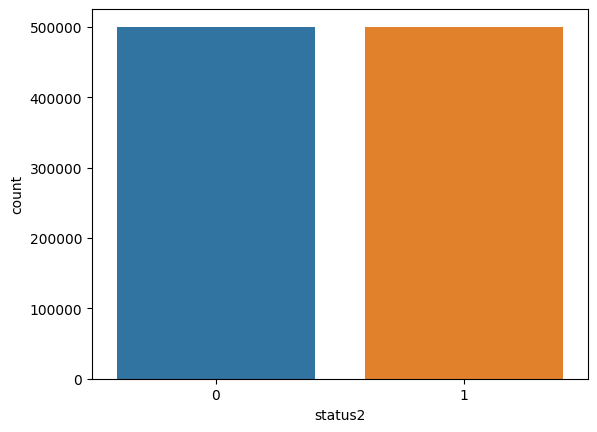

In [16]:
sns.countplot(x = 'status2', data = df)

Establish the correlation matrix of the features

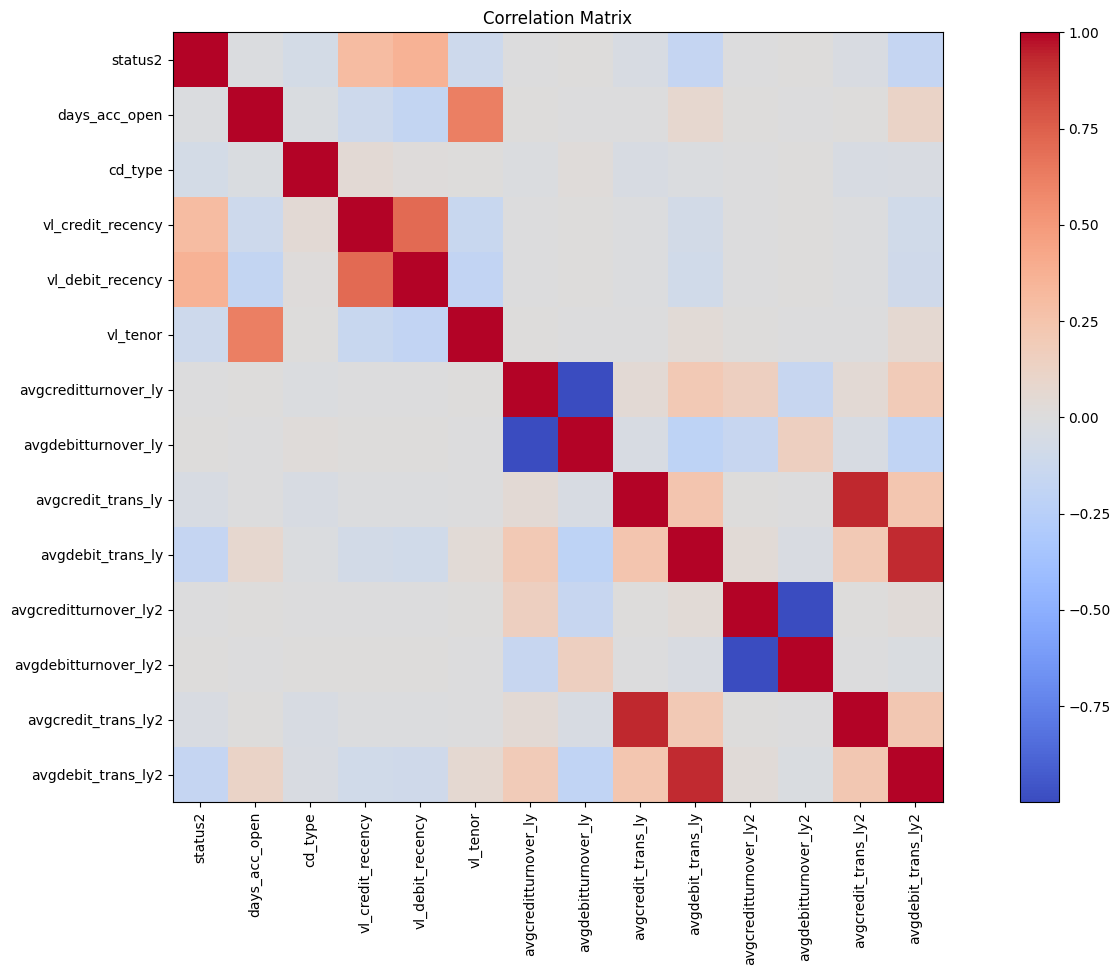

In [17]:
corr = df.corr()

plt.figure(figsize = (20, 10))
plt.imshow(corr, cmap = 'coolwarm', interpolation = 'none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation = 90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Matrix')
plt.show()

Differentiate between categorical variables and numerical variables. Categorical variables are normally objects in nature, but in our case we have only one variable which is an integer in nature

In [18]:
binary = ['cd_type']
numerical = ['days_acc_open', 'vl_credit_recency', 'vl_debit_recency', 'vl_tenor', 'avgcreditturnover_ly', 'avgdebitturnover_ly', 'avgcredit_trans_ly',
             'avgdebit_trans_ly', 'avgcreditturnover_ly2', 'avgdebitturnover_ly2', 'avgcredit_trans_ly2', 'avgdebit_trans_ly2']

# **Step 3.1: Exploratory Data Analysis on Categorical Variables**

In [19]:
df[binary].nunique()

cd_type    2
dtype: int64

Establish value counts for the customer account types

<Axes: xlabel='cd_type', ylabel='count'>

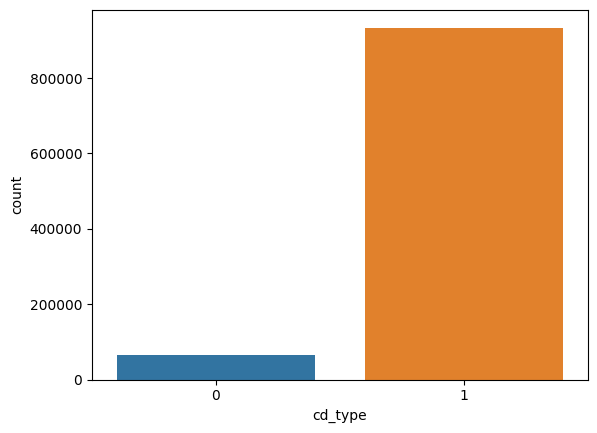

In [20]:
sns.countplot(x = "cd_type", data = df)

# **Step 3.2: Exploratory Data Analysis on Numerical Variables**

In [21]:
df[numerical].nunique()

days_acc_open              8054
vl_credit_recency          4914
vl_debit_recency           4927
vl_tenor                  10077
avgcreditturnover_ly     330374
avgdebitturnover_ly      388473
avgcredit_trans_ly         3740
avgdebit_trans_ly          2356
avgcreditturnover_ly2    408691
avgdebitturnover_ly2     463830
avgcredit_trans_ly2        5023
avgdebit_trans_ly2         3790
dtype: int64

# **Step 4: Feature Selection**

In [22]:
X = df.drop('status2', axis = 1)
y = df['status2']

# **Step 4.1: Feature Selection Using L1 Regularization - Lasso Regression**

In [23]:
lasso = Lasso(alpha = 0.3)
lasso.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.048e+05, tolerance: 2.500e+01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.3)

In [24]:
lasso_coef = {'Feature': X.columns, 'Coefficient': lasso.coef_}
l1_df = pd.DataFrame(lasso_coef)

l1_df = l1_df.reindex(l1_df['Coefficient'].abs().sort_values(ascending = False).index)

print("Lasso Coefficients")
print("==================")
l1_df.head(200)

Lasso Coefficients


,Feature,Coefficient
12,avgdebit_trans_ly2,-2.151806e-03
0,days_acc_open,3.854457e-05
3,vl_debit_recency,2.676413e-05
4,vl_tenor,-2.535196e-05
2,vl_credit_recency,9.539417e-06
6,avgdebitturnover_ly,-4.097994e-09
5,avgcreditturnover_ly,-2.992299e-09
9,avgcreditturnover_ly2,-5.611298e-11
10,avgdebitturnover_ly2,-5.153476e-11
1,cd_type,-0.000000e+00


from matplotlib import pyplot as plt
_df_0['Coefficient'].plot(kind='hist', bins=20, title='Coefficient')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Coefficient'].plot(kind='line', figsize=(8, 4), title='Coefficient')
plt.gca().spines[['top', 'right']].set_visible(False)

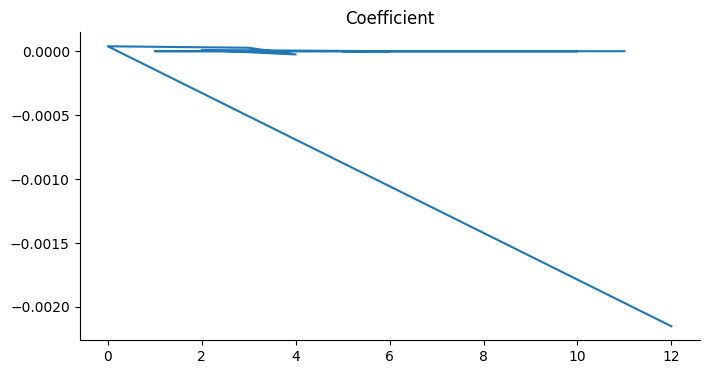

In [26]:
_df_1['Coefficient'].plot(kind='line', figsize=(8, 4), title='Coefficient')
plt.gca().spines[['top', 'right']].set_visible(False)

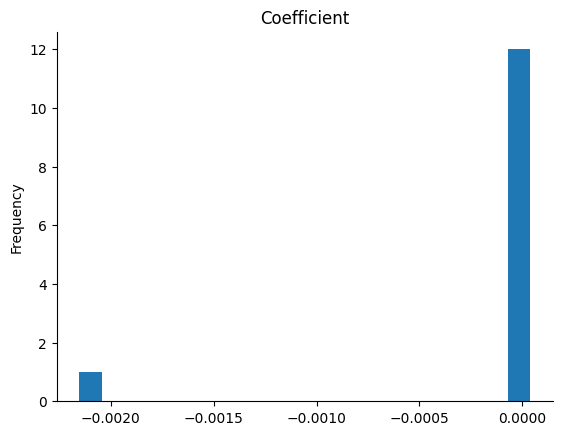

In [27]:
_df_0['Coefficient'].plot(kind='hist', bins=20, title='Coefficient')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [28]:
lasso_features = l1_df[l1_df['Coefficient'].abs() > 0]

print("Selected Features with Coefficients Greater than 0")
print("=============================================")
print(lasso_features)

Selected Features with Coefficients Greater than 0
                  Feature   Coefficient
12     avgdebit_trans_ly2 -2.151806e-03
0           days_acc_open  3.854457e-05
3        vl_debit_recency  2.676413e-05
4                vl_tenor -2.535196e-05
2       vl_credit_recency  9.539417e-06
6     avgdebitturnover_ly -4.097994e-09
5    avgcreditturnover_ly -2.992299e-09
9   avgcreditturnover_ly2 -5.611298e-11
10   avgdebitturnover_ly2 -5.153476e-11


# **Step 4.2: Feature Selection Using L2 Regularization - Ridge Regression**

In [29]:
ridge = Ridge(alpha = 10)
ridge.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.39746e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=10)

In [30]:
ridge_coef = {'Feature': X.columns, 'Coefficient': ridge.coef_}
l2_df = pd.DataFrame(ridge_coef)

l2_df = l2_df.reindex(l2_df['Coefficient'].abs().sort_values(ascending = False).index)

print("Ridge Coefficients")
print("==================")
l2_df.head(10)

Ridge Coefficients


,Feature,Coefficient
1,cd_type,-1.457261e-01
12,avgdebit_trans_ly2,-1.939533e-03
8,avgdebit_trans_ly,-1.077043e-03
7,avgcredit_trans_ly,-1.455968e-04
11,avgcredit_trans_ly2,5.906820e-05
0,days_acc_open,3.824159e-05
3,vl_debit_recency,2.632367e-05
4,vl_tenor,-2.517429e-05
2,vl_credit_recency,1.011386e-05
6,avgdebitturnover_ly,-1.949677e-08


from matplotlib import pyplot as plt
_df_2['Coefficient'].plot(kind='hist', bins=20, title='Coefficient')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Coefficient'].plot(kind='line', figsize=(8, 4), title='Coefficient')
plt.gca().spines[['top', 'right']].set_visible(False)

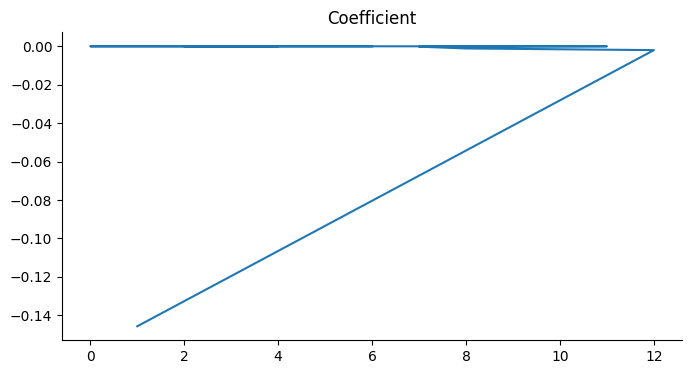

In [31]:
_df_3['Coefficient'].plot(kind='line', figsize=(8, 4), title='Coefficient')
plt.gca().spines[['top', 'right']].set_visible(False)

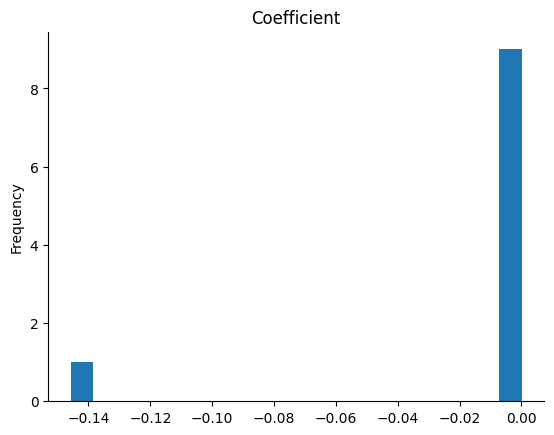

In [32]:
_df_2['Coefficient'].plot(kind='hist', bins=20, title='Coefficient')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [33]:
ridge_features = l2_df[l2_df['Coefficient'].abs() > 0]

print("Selected Features with Coefficients Greater than 10")
print("=============================================")
print(ridge_features)

Selected Features with Coefficients Greater than 10
                  Feature   Coefficient
1                 cd_type -1.457261e-01
12     avgdebit_trans_ly2 -1.939533e-03
8       avgdebit_trans_ly -1.077043e-03
7      avgcredit_trans_ly -1.455968e-04
11    avgcredit_trans_ly2  5.906820e-05
0           days_acc_open  3.824159e-05
3        vl_debit_recency  2.632367e-05
4                vl_tenor -2.517429e-05
2       vl_credit_recency  1.011386e-05
6     avgdebitturnover_ly -1.949677e-08
5    avgcreditturnover_ly -1.809892e-08
9   avgcreditturnover_ly2 -7.413163e-10
10   avgdebitturnover_ly2 -7.364579e-10


In [34]:
X_new = df[['vl_credit_recency', 'vl_debit_recency', 'days_acc_open', 'avgcredit_trans_ly2']]
y_new = df['status2']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [36]:
log_model = LogisticRegression()

log_model.fit(X_train, y_train)
y_pred_log_model = log_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
print('Logistic Regression Model Accuracy:', accuracy_score(y_test, y_pred_log_model))
print('Logistic Regression Model Classification Report:')
print(classification_report(y_test, y_pred_log_model))

Logistic Regression Model Accuracy: 0.8733025
Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88    199895
           1       0.95      0.79      0.86    200105

    accuracy                           0.87    400000
   macro avg       0.89      0.87      0.87    400000
weighted avg       0.89      0.87      0.87    400000



In [38]:
y_pred = log_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8733025


In [39]:
accuracy_s = accuracy_score(y_test, y_pred >= 0.5)

In [40]:
true_positive = ((y_pred >= 0.5) & (y_test == 1)).sum()
false_positive = ((y_pred >= 0.5) & (y_test == 0)).sum()
false_negative = ((y_pred < 0.5) & (y_test == 1)).sum()
true_negative = ((y_pred < 0.5) & (y_test == 0)).sum()

In [41]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2* ((recall * precision) / (recall + precision))
precision, recall, f1_score

(0.9533665865676352, 0.7851428000299843, 0.8611157546841472)

In [42]:
import unittest

def train_logistic_regression(X_train, y_train):
  model = LogisticRegression()
  model.fit(X_train, y_train)
  return model

def predict(model, X_new):
  return model.predict(X_new)

def evaluate_accuracy(y_true, y_pred):
  return accuracy_score(y_true, y_pred)

class TestLogisticRegressionModel(unittest.TestCase):
  def setUp(self):
    # Generate synthetic data for testing
    np.random.seed(42)
    X = np.random.rand(100, 3)
    y = (X[:, 0] + X[:, 1] + X[:, 2] > 1.5).astype(int)

    # Split the data into training and testing sets
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a logistic regression model
    self.model = train_logistic_regression(self.X_train, self.y_train)

    def test_prediction(self):
      # Test if the model predicts correctly on the test set
      y_pred = predict(self.model, self.X_test)
      self.assertTrue(np.allclose(evaluate_accuracy(self.y_test, y_pred), 1.0))

      def test_accuracy(self):
        # Test if the accuracy is within a reasonable range
        y_pred = predict(self.model, self.X_test)
        accuracy = evaluate_accuracy(self.y_test, y_pred)
        self.assertTrue(0.8 <= accuracy <= 1.0)

if __name__ == '__main__':
    # Define a test suite
    suite = unittest.TestLoader().loadTestsFromTestCase(TestLogisticRegressionModel)

    # Run the test suite
    unittest.TextTestRunner(verbosity=2).run(suite)


----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK


In [43]:
import unittest
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class TestLogisticRegression(unittest.TestCase):
    def setUp(self):
        # Generate some example data for testing
        np.random.seed(42)
        X_new = np.random.rand(100, 2)  # 100 samples, 2 features
        y_new = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary classification

        # Split the data into training and testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Initialize the Logistic Regression model
        self.model = LogisticRegression()

        # Fit the model on the training data
        self.model.fit(self.X_train, self.y_train)

    def test_accuracy(self):
        # Make predictions on the test set
        y_pred = self.model.predict(self.X_test)

        # Calculate accuracy
        accuracy = accuracy_score(self.y_test, y_pred)

        # Assert that the accuracy is above a certain threshold (adjust as needed)
        self.assertGreater(accuracy, 0.8)

if __name__ == '__main__':
    # Define a test suite
    suite = unittest.TestLoader().loadTestsFromTestCase(TestLogisticRegressionModel)

    # Run the test suite
    unittest.TextTestRunner(verbosity=2).run(suite)


----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK


In [44]:
import unittest
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

class TestLinearRegression(unittest.TestCase):
    def setUp(self):
        # Generate some example data for testing
        np.random.seed(42)
        X = np.random.rand(100, 2)  # 100 samples, 2 features
        y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.normal(0, 0.1, 100)  # Linear regression task

        # Split the data into training and testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Initialize the Linear Regression model
        self.model = LinearRegression()

        # Fit the model on the training data
        self.model.fit(self.X_train, self.y_train)

    def test_mse(self):
        # Make predictions on the test set
        y_pred = self.model.predict(self.X_test)

        # Use MSE as the regression metric
        mse = mean_squared_error(self.y_test, y_pred)

        # Assert that the MSE is below a certain threshold (adjust as needed)
        self.assertLess(mse, 20.0)

if __name__ == '__main__':
    # Define a test suite
    suite = unittest.TestLoader().loadTestsFromTestCase(TestLogisticRegressionModel)

    # Run the test suite
    unittest.TextTestRunner(verbosity=2).run(suite)


----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK


In [45]:
thresholds = np.linspace(0, 1, 11)
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [46]:
thresholds = np.linspace(0, 1, 21)

accuracies = []

for t in thresholds:
    acc = accuracy_score(y_test, y_pred >= t)
    accuracies.append(acc)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.500
0.05 0.873
0.10 0.873
0.15 0.873
0.20 0.873
0.25 0.873
0.30 0.873
0.35 0.873
0.40 0.873
0.45 0.873
0.50 0.873
0.55 0.873
0.60 0.873
0.65 0.873
0.70 0.873
0.75 0.873
0.80 0.873
0.85 0.873
0.90 0.873
0.95 0.873
1.00 0.873


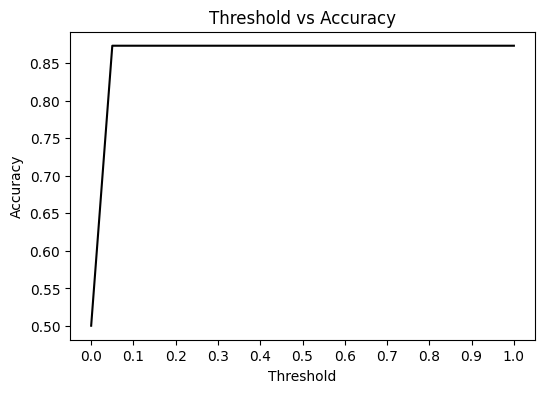

In [47]:
plt.figure(figsize=(6, 4))

plt.plot(thresholds, accuracies, color='black')

plt.title('Threshold vs Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')

plt.xticks(np.linspace(0, 1, 11))

plt.savefig('04_threshold_accuracy.svg')

plt.show()

In [48]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds: #B
    tp = ((y_pred >= t) & (y_test == 1)).sum()
    fp = ((y_pred >= t) & (y_test == 0)).sum()
    fn = ((y_pred < t) & (y_test == 1)).sum()
    tn = ((y_pred < t) & (y_test == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [49]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,200105,199895,0,0
10,0.1,157111,7685,42994,192210
20,0.2,157111,7685,42994,192210
30,0.3,157111,7685,42994,192210
40,0.4,157111,7685,42994,192210
50,0.5,157111,7685,42994,192210
60,0.6,157111,7685,42994,192210
70,0.7,157111,7685,42994,192210
80,0.8,157111,7685,42994,192210
90,0.9,157111,7685,42994,192210


In [50]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [51]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,200105,199895,0,0,1.000000,1.000000
10,0.1,157111,7685,42994,192210,0.785143,0.038445
20,0.2,157111,7685,42994,192210,0.785143,0.038445
30,0.3,157111,7685,42994,192210,0.785143,0.038445
40,0.4,157111,7685,42994,192210,0.785143,0.038445
50,0.5,157111,7685,42994,192210,0.785143,0.038445
60,0.6,157111,7685,42994,192210,0.785143,0.038445
70,0.7,157111,7685,42994,192210,0.785143,0.038445
80,0.8,157111,7685,42994,192210,0.785143,0.038445
90,0.9,157111,7685,42994,192210,0.785143,0.038445


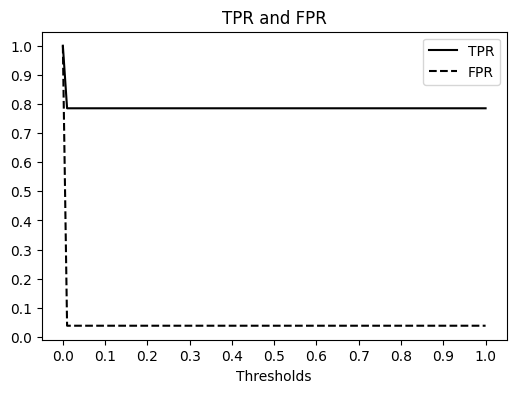

In [52]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR')

# plt.savefig('04_fpr_tpr_plot.svg')

plt.show()

In [53]:
def tpr_fpr_dataframe(y_test, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        tp = ((y_pred >= t) & (y_test == 1)).sum()
        fp = ((y_pred >= t) & (y_test == 0)).sum()
        fn = ((y_pred < t) & (y_test == 1)).sum()
        tn = ((y_pred < t) & (y_test == 0)).sum()

        scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [54]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_test))
df_rand = tpr_fpr_dataframe(y_test, y_rand)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,200105,199895,0,0,1.000000,1.000000
10,0.1,179887,179866,20218,20029,0.898963,0.899802
20,0.2,159908,160001,40197,39894,0.799120,0.800425
30,0.3,139967,139799,60138,60096,0.699468,0.699362
40,0.4,120069,120042,80036,79853,0.600030,0.600525
50,0.5,99956,100096,100149,99799,0.499518,0.500743
60,0.6,79988,80129,120117,119766,0.399730,0.400855
70,0.7,59898,60258,140207,139637,0.299333,0.301448
80,0.8,39776,40076,160329,159819,0.198776,0.200485
90,0.9,19786,20094,180319,179801,0.098878,0.100523


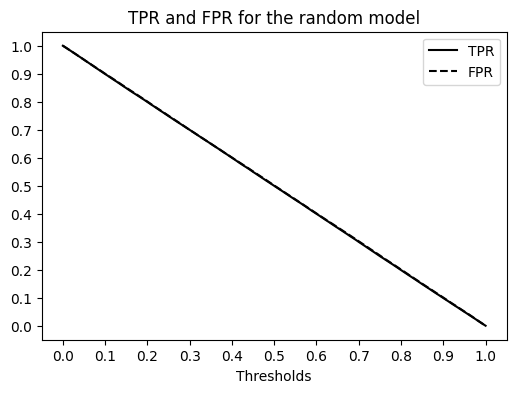

In [55]:
plt.figure(figsize=(6, 4))

plt.plot(df_rand.threshold, df_rand.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR for the random model')

plt.savefig('04_fpr_tpr_plot_random.svg')

plt.show()

In [56]:
num_neg = (y_test == 0).sum()
num_pos = (y_test == 1).sum()

y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,200105,199895,0,0,1.000000,1.000000
10,0.1,200105,159895,0,40000,1.000000,0.799895
20,0.2,200105,119895,0,80000,1.000000,0.599790
30,0.3,200105,79895,0,120000,1.000000,0.399685
40,0.4,200105,39895,0,160000,1.000000,0.199580
50,0.5,200000,0,105,199895,0.999475,0.000000
60,0.6,160000,0,40105,199895,0.799580,0.000000
70,0.7,120000,0,80105,199895,0.599685,0.000000
80,0.8,80000,0,120105,199895,0.399790,0.000000
90,0.9,40000,0,160105,199895,0.199895,0.000000


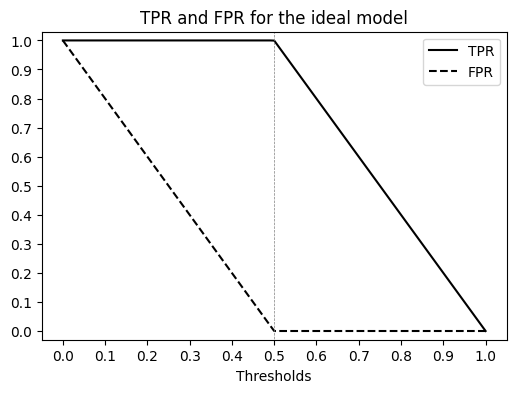

In [57]:
plt.figure(figsize=(6, 4))

plt.plot(df_ideal.threshold, df_ideal.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.vlines(1 - y_test.mean(), -1, 2, linewidth=0.5, linestyle='dashed', color='grey')
plt.ylim(-0.03, 1.03)

plt.xlabel('Thresholds')
plt.title('TPR and FPR for the ideal model')

plt.savefig('04_fpr_tpr_plot_ideal.svg')

plt.show()

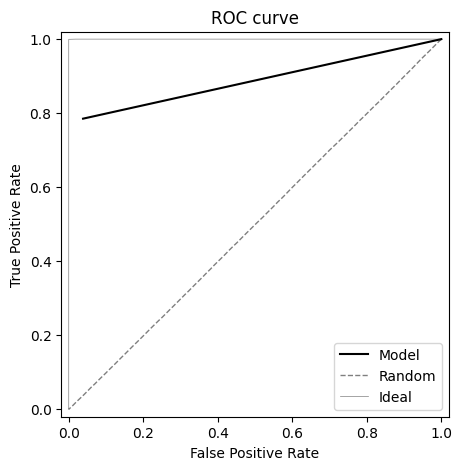

In [58]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, color='black', label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, color='black', lw=1,
         linestyle='dashed', alpha=0.5, label='Random')
plt.plot(df_ideal.fpr, df_ideal.tpr, color='black', lw=0.5,
         linestyle='solid', alpha=0.5, label='Ideal')

plt.legend()

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.savefig('04_roc_curve_with_baselines.svg')

plt.show()

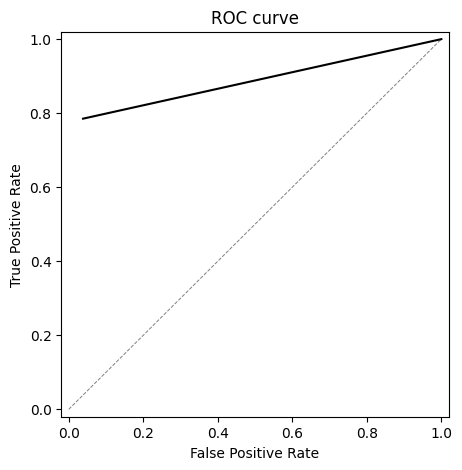

In [59]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.savefig('04_roc_curve.svg')

plt.show()

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

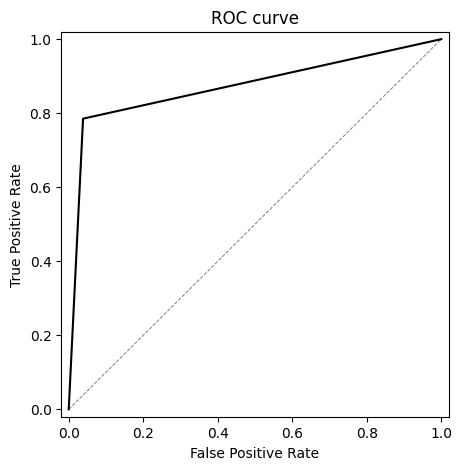

In [61]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

In [62]:
params = log_model.get_params()
params_table = pd.DataFrame.from_dict(params, orient = 'index', columns = ['Value'])
print(params_table)

                    Value
C                     1.0
class_weight         None
dual                False
fit_intercept        True
intercept_scaling       1
l1_ratio             None
max_iter              100
multi_class          auto
n_jobs               None
penalty                l2
random_state         None
solver              lbfgs
tol                0.0001
verbose                 0
warm_start          False


In [63]:
# Define the cross-validation method
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)

# Initialize a list to store the cross-validation accuracy scores
scores = []

# Loop over the folds
for fold, (train_idx, test_idx) in enumerate(kfold.split(X_new, y_new)):

    # Get the training and testing data for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the model on the training data
    log_model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = log_model.predict(X_test)

    # Calculate the accuracy score for this fold and append it to the list of scores
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

    # Print the accuracy score for this fold
    print(f'Fold {fold+1} accuracy: {score:.3f}')

# Print the mean and standard deviation of the cross-validation accuracy scores
print(f'Mean accuracy: {np.mean(scores):.3f}')
print(f'Standard deviation: {np.std(scores):.3f}')

Fold 1 accuracy: 0.905


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 2 accuracy: 0.905


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 3 accuracy: 0.905


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 4 accuracy: 0.903


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 5 accuracy: 0.905
Fold 6 accuracy: 0.903
Fold 7 accuracy: 0.904


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 8 accuracy: 0.921


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 9 accuracy: 0.906
Fold 10 accuracy: 0.820
Mean accuracy: 0.898
Standard deviation: 0.026


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
